In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os

In [45]:
os.chdir('C:\\Users\\Admin\\Downloads\\imp files\\assingments\\iris/')
df=pd.read_csv('iris.csv')

In [46]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [10]:
df.shape

(150, 6)

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
plt.rcParams['figure.figsize']=(10,8)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

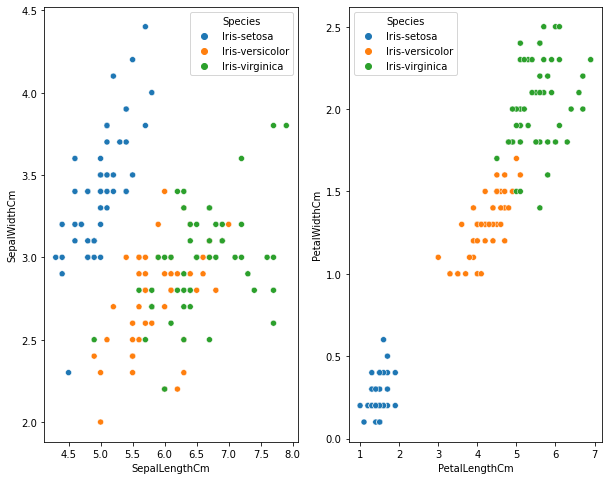

In [14]:
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species',data=df)
plt.subplot(1,2,2)
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df)

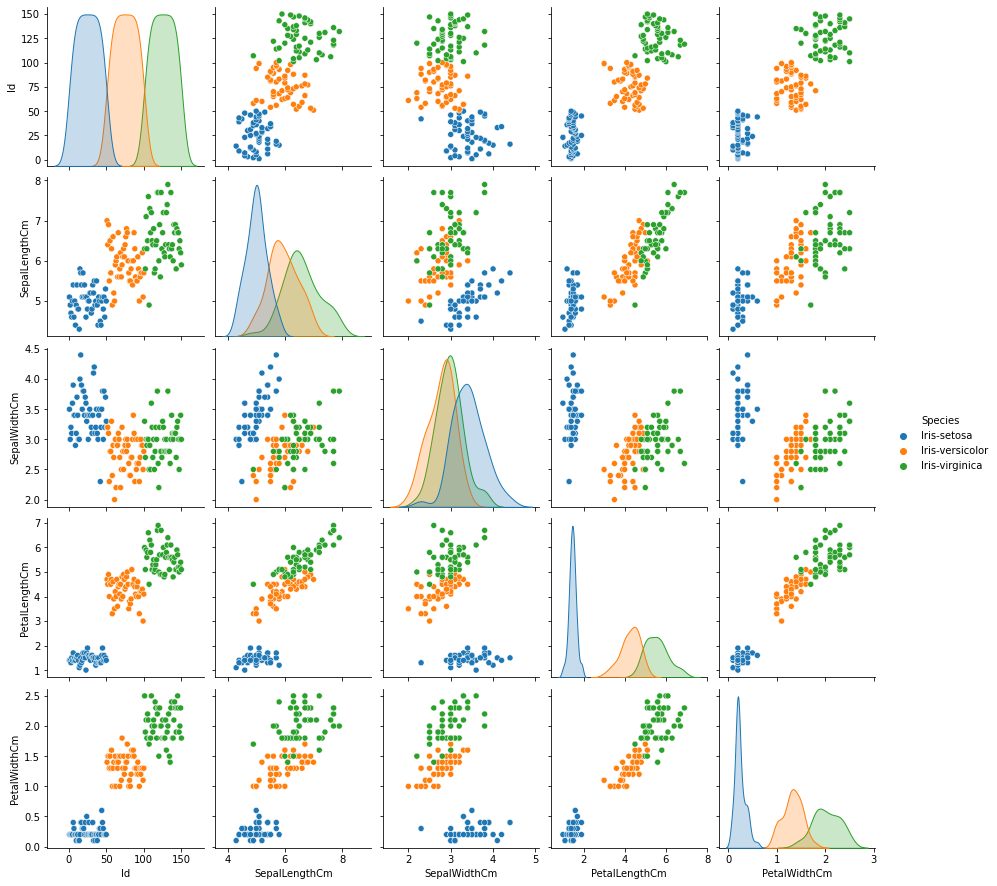

In [15]:
sns.pairplot(df,hue='Species')

In [16]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

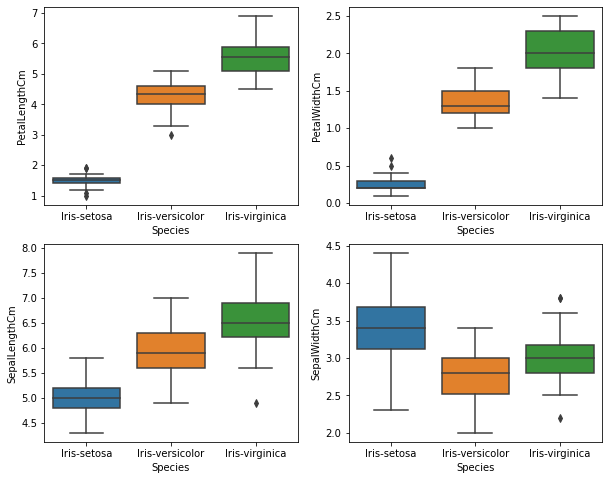

In [17]:
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)

plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

# pre processing


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label=LabelEncoder()
df['new_species']=label.fit_transform(df['Species'])

In [49]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   new_species  
0            0  
1            0  
2            0  
3            0  
4            0

In [50]:
x=df.drop(['Species','new_species'],axis=1)
y=df['new_species']

## model building


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [55]:
scaled_X_train = sc.fit_transform(x_train)
scaled_X_test = sc.transform(x_test)

In [39]:
def models(mod,x_t,y_t,x_tst,y_tst):
    mod.fit(x_t,y_t)
    pred=mod.predict(x_tst)
    
    
    print('accuracy:',accuracy_score(y_tst,pred))
    print("------")
    print('metric:',confusion_matrix(y_tst,pred))
    

# logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
models(model,x_train,y_train,x_test,y_test)

accuracy: 1.0
------
metric: [[42  0  0]
 [ 0 36  0]
 [ 0  0 35]]


# DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini',random_state=45)
models(model,x_train,y_train,x_test,y_test)


accuracy: 0.9911504424778761
------
metric: [[42  0  0]
 [ 0 36  0]
 [ 0  1 34]]


# KNeighborsClassifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=6)
models(model,x_train,y_train,x_test,y_test)


accuracy: 1.0
------
metric: [[42  0  0]
 [ 0 36  0]
 [ 0  0 35]]


# RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=180,random_state=0,criterion='gini')
models(model,x_train,y_train,x_test,y_test)


accuracy: 0.9734513274336283
------
metric: [[42  0  0]
 [ 0 33  3]
 [ 0  0 35]]


In [64]:
model=RandomForestClassifier(n_estimators=180,random_state=0,criterion='gini')
models(model,scaled_X_train,y_train,scaled_X_test,y_test)

accuracy: 0.9734513274336283
------
metric: [[42  0  0]
 [ 0 33  3]
 [ 0  0 35]]
